<a href="https://colab.research.google.com/github/XcLyBr/Defaulting-Card-Payment/blob/main/DefaultingCreditCards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEFAULTING IN CREDIT CARD PAYMENTS**

By: Jose Antonio Villegas

# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data and Inspection

In [ ]:
path = '/content/credit_data.csv'
df = pd.read_csv(path)
df.head()

,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,0,0,27.250000,4,0,0,0,0,1200.000000,0,18000.0,0.000667,,
1,0,0,40.833332,111,3,0,0,1,4000.000000,0,13500.0,0.000222,,
2,1,0,37.666668,54,3,0,0,1,3666.666667,0,11300.0,0.033270,121.9896773,4.8039364
3,1,0,42.500000,60,3,0,0,1,2000.000000,0,17250.0,0.048427,96.8536213,4.5732008
4,1,0,21.333334,8,0,0,0,0,2916.666667,0,35000.0,0.016523,48.1916700,3.8751862


Source : https://www.kaggle.com/surekharamireddy/credit-data

# Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13444 entries, 0 to 13443
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CARDHLDR   13444 non-null  int64  
 1   DEFAULT    13444 non-null  int64  
 2   AGE        13444 non-null  float64
 3   ACADMOS    13444 non-null  int64  
 4   ADEPCNT    13444 non-null  int64  
 5   MAJORDRG   13444 non-null  int64  
 6   MINORDRG   13444 non-null  int64  
 7   OWNRENT    13444 non-null  int64  
 8   INCOME     13444 non-null  float64
 9   SELFEMPL   13444 non-null  int64  
 10  INCPER     13444 non-null  float64
 11  EXP_INC    13444 non-null  float64
 12  SPENDING   13444 non-null  object 
 13  LOGSPEND   13444 non-null  object 
dtypes: float64(4), int64(8), object(2)
memory usage: 1.4+ MB


# Data Statistics

In [ ]:
df.describe()

,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC
count,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000
mean,0.780943,0.074085,33.471828,55.318878,1.017257,0.462809,0.290539,0.455965,2509.527819,0.057944,21719.680793,0.070974
std,0.413623,0.261919,10.226484,63.089729,1.279098,1.432724,0.767620,0.498076,1252.946716,0.233646,13591.209469,0.103922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,362.500000,0.000088
25%,1.000000,0.000000,25.666666,12.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.000000,12000.000000,0.002706
50%,1.000000,0.000000,31.500000,30.000000,1.000000,0.000000,0.000000,0.000000,2166.666667,0.000000,19000.000000,0.039286
75%,1.000000,0.000000,39.333332,72.000000,2.000000,0.000000,0.000000,1.000000,2916.666667,0.000000,27658.666504,0.095655
max,1.000000,1.000000,88.666664,576.000000,9.000000,22.000000,11.000000,1.000000,8333.250000,1.000000,150000.000000,2.037728


# Description of Data

In [ ]:

# CARDHLDR  1 if application for credit card accepted, 0 if not
# DEFAULT   1 if defaulted 0 if not (observed when CARDHLDR=1, 10,499 observations)
# AGE       Age in years plus twelfths of a year
# ACADMOS   months living at current address
# ADEPCNT   number of dependents
# MAJORDRG  Number of major derogatory reports
# MINORDRG  Number of minor derogatory reports
# OWNRENT   1 if owns their home, 0 if rent
# INCOME    Monthly income (divided by 10,000)
# SELFEMPL  1 if self employed, 0 if not
# INCPER    Income divided by number of dependents
# EXP_INC   Ratio of monthly credit card expenditure to yearly income
# SPENDING  Average monthly credit card expenditure (for CARDHOLDER = 1)
# LOGSPEND  Log of spending

By info() we see that the dataframe is made up of 14 columns and 13444 rows with a mix of int, float and object.

# Unnecessary Columns

In [ ]:
df.columns

Index(['CARDHLDR', 'DEFAULT', 'AGE', 'ACADMOS', 'ADEPCNT', 'MAJORDRG',
       'MINORDRG', 'OWNRENT', 'INCOME', 'SELFEMPL', 'INCPER', 'EXP_INC',
       'SPENDING', 'LOGSPEND '],
      dtype='object')

Performed df.columns because there was an error that 'LOGSPEND' could "not be found in axis". A space was found before the quotation mark.


In [ ]:
df = df.drop(columns = ['CARDHLDR', 'LOGSPEND '])

Description shows that 'CARDHLDR' application has been accepted or not. Dropped this because it is assumed that data is for cardholder and not applicants.

'LOGSPEND' dropped by description just show log of spending, not much information.

# Duplicate Check

In [ ]:
df.duplicated().sum()

0

# Null Values Check

In [ ]:
df.isnull().sum()

DEFAULT     0
AGE         0
ACADMOS     0
ADEPCNT     0
MAJORDRG    0
MINORDRG    0
OWNRENT     0
INCOME      0
SELFEMPL    0
INCPER      0
EXP_INC     0
SPENDING    0
dtype: int64

# Visualizations

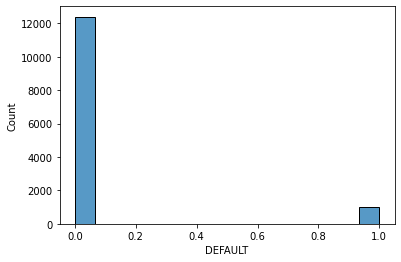

In [ ]:
# df['DEFAULT'].hist();
# this is our target
sns.histplot(data=df, x = "DEFAULT");

Most distribution of data gathered leans towards 0 or not defaulted. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


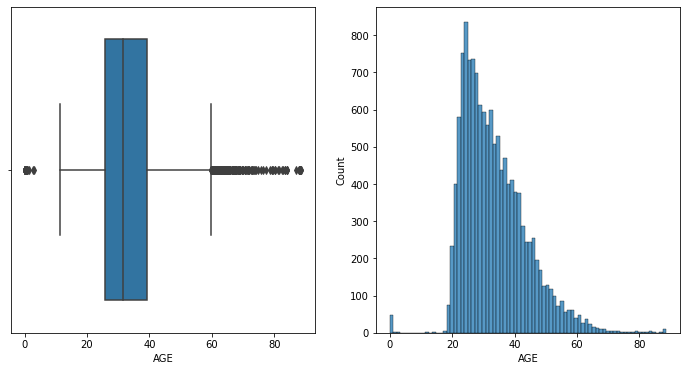

In [ ]:
# df.boxplot('AGE');
# plt.title('AGE');
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['AGE'], ax=ax[0])
sns.histplot(df['AGE'], ax=ax[1]);

In [ ]:
df['AGE'].value_counts()

24.833334    78
24.250000    75
26.000000    74
25.000000    68
23.083334    67
             ..
84.166664     1
1.583333      1
76.333336     1
68.833336     1
73.416664     1
Name: AGE, Length: 643, dtype: int64

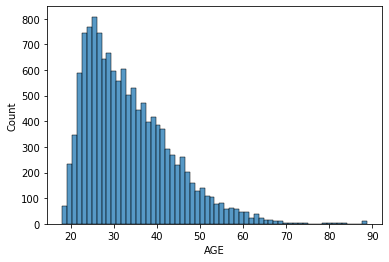

In [ ]:
# df['AGE'].hist();
# plt.title('AGE');
sns.histplot(data=df, x = "AGE");

Noticeably there are outliers in our 'AGE' data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


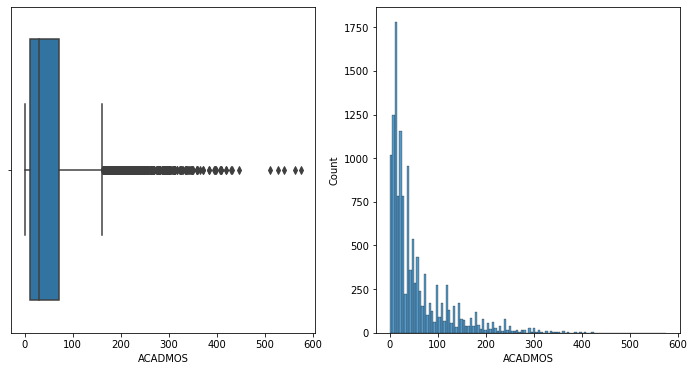

In [ ]:
# df.boxplot('ACADMOS');
# plt.title('ACADMOS');
# sns.boxplot(x = 'ACADMOS', data=df);
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['ACADMOS'], ax=ax[0])
sns.histplot(df['ACADMOS'], ax=ax[1]);

In [ ]:
# df['ACADMOS'].hist();
# plt.title('Months Living in Current Address');
# sns.histplot(data=df, x = "ACADMOS");

Noticeably there are outliers in our 'ACADMOS' data. (Months living in current address)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


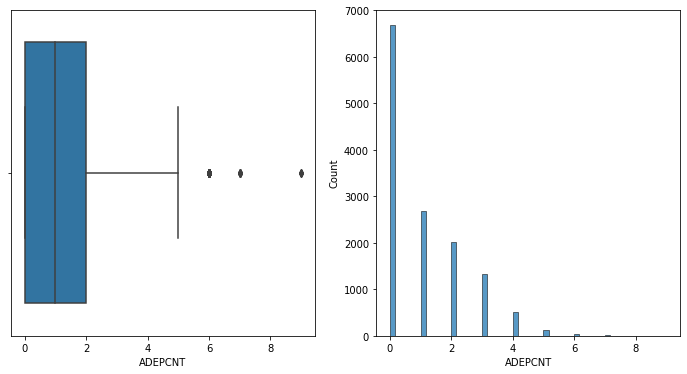

In [ ]:
# df.boxplot('ADEPCNT');
# plt.title('ADEPCNT');
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['ADEPCNT'], ax=ax[0])
sns.histplot(df['ADEPCNT'], ax=ax[1])

In [ ]:
# df['ADEPCNT'].hist();
# plt.title('Number of Dependents');

Minimal outliers seen in 'ADEPCNT'. (Number of dependents)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


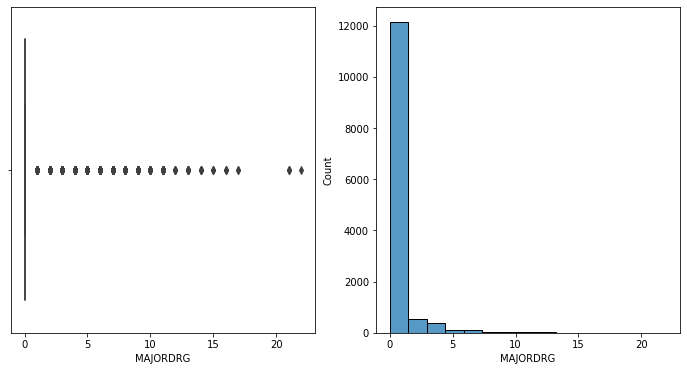

In [ ]:
# df.boxplot('MAJORDRG');
# plt.title('MAJORDRG');
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['MAJORDRG'], ax=ax[0])
sns.histplot(df['MAJORDRG'], ax=ax[1]);

In [ ]:
# df['MAJORDRG'].hist();
# plt.title('With Major Derogatory Report');

Noticeably multiple outliers in the 'MAJORDRG' (Number of major derogatory reports)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


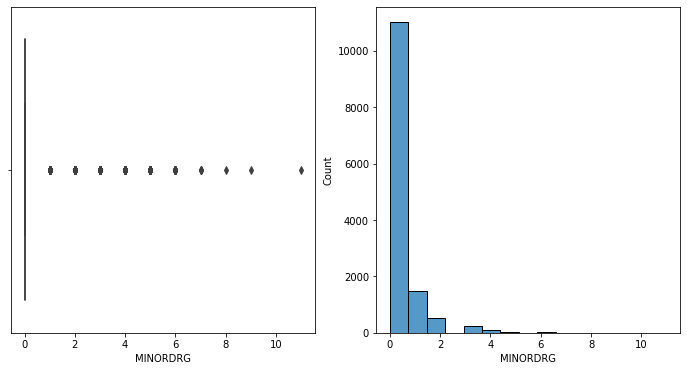

In [ ]:
# df.boxplot('MINORDRG');
# plt.title('MINORDRG');
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['MINORDRG'], ax=ax[0])
sns.histplot(df['MINORDRG'], ax=ax[1]);

In [ ]:
# df['MINORDRG'].hist();
# plt.title('With Minor Derogatory Report');

Minimal outliers for the 'MINORDRG' (Number of minor derogatory reports)

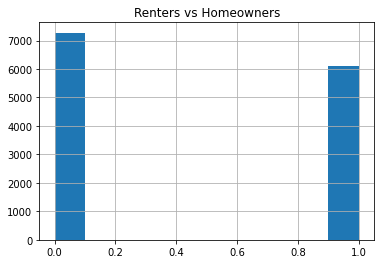

In [ ]:
df['OWNRENT'].hist();
plt.title('Renters vs Homeowners');

Graph compares (0) renters to (1) homeowners.

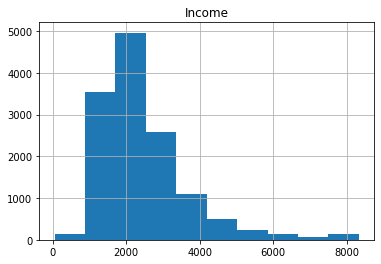

In [ ]:
df['INCOME'].hist();
plt.title('Income');

INCOME    Monthly income (divided by 10,000)

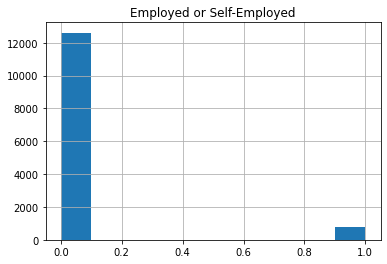

In [ ]:
df['SELFEMPL'].hist();
plt.title('Employed or Self-Employed');

Noticeably that there are more employed than self-employed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


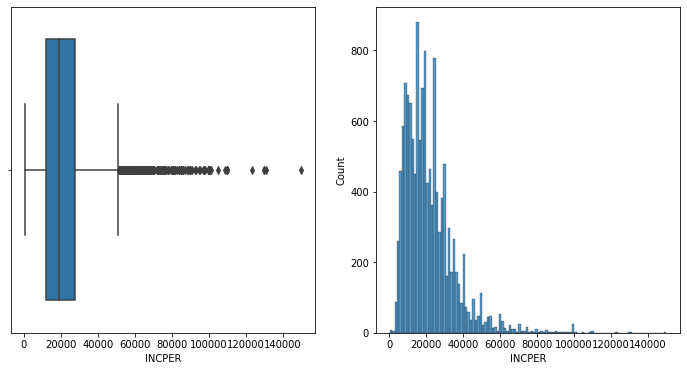

In [ ]:
# df.boxplot('INCPER');
# plt.title('INCPER');
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(df['INCPER'], ax=ax[0])
sns.histplot(df['INCPER'], ax=ax[1]);

A noticeably high number of outliers on 'INCPER' (Income Divided by Number of Dependents)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


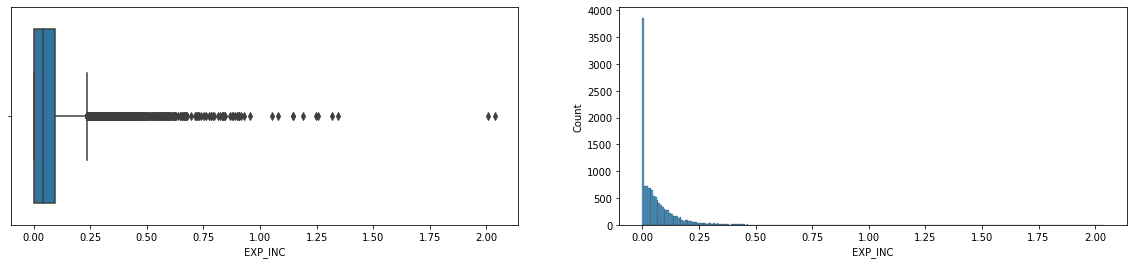

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
sns.boxplot(df['EXP_INC'], ax=ax[0])
sns.histplot(df['EXP_INC'], ax=ax[1]);

A noticeably high number of outliers with 'EXP_INC' (Ratio of monthly credit card expenditure to yearly income)

# **HEATMAP**

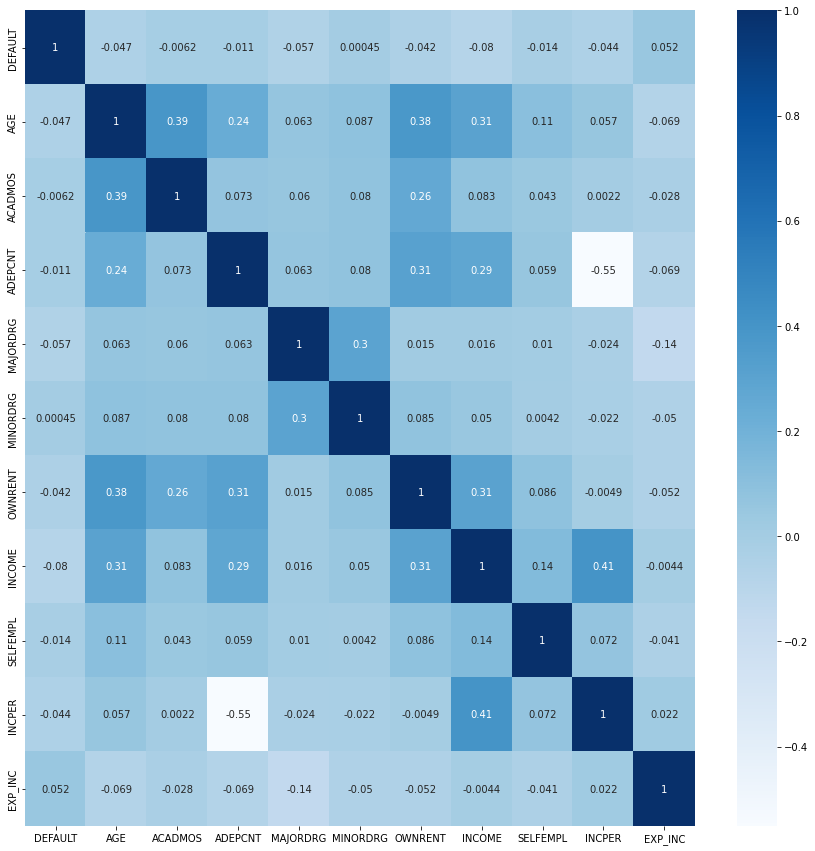

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='Blues', annot=True);

The correlation matrix shows no strong positive or negative correlations between numeric data.

# **Defaulting in Payments**

Looking at features, factors or variables can/may default a credit card holder with his/her payments.

In [ ]:
D1 = df.groupby('DEFAULT')['MAJORDRG'].sum()
D1

DEFAULT
0    6028
1     175
Name: MAJORDRG, dtype: int64

Base on major derogatory reports:

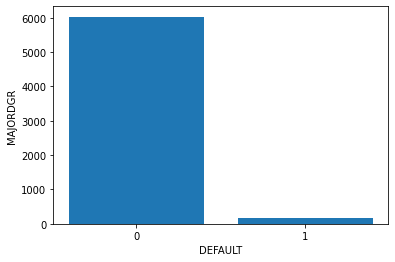

In [ ]:
labels = [0, 1]
plt.bar(D1.index, D1.values)
plt.ylabel('MAJORDGR')
plt.xlabel('DEFAULT')
plt.xticks(labels)
plt.show()

In [ ]:
D2 = df.groupby('DEFAULT')['INCOME'].mean() # Income diveded by 10,000
D2

DEFAULT
0    2539.222077
1    2155.431101
Name: INCOME, dtype: float64

Based on income:

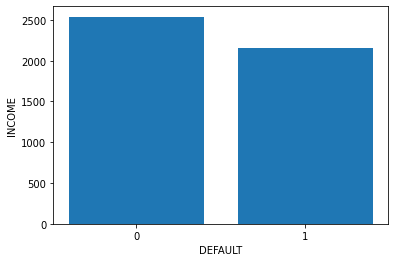

In [ ]:
plt.bar(D2.index, D2.values)
plt.ylabel('INCOME')
plt.xlabel('DEFAULT')
plt.xticks(labels)

plt.show()

At this point, I'm still having a though decision whether to drop 'AGE' or not. Based on .describe(), there is a MAX age of 88. Creditcards were introduced in the 1950's. Minimum age requirement for card holder is 18 so I might just drop that "AGE' < 18. Data Description does not say much either whether its age of cardholder or number of years cardholder has credit card.